C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

KMeans distribution:
 km_cluster
1    58.75
0    41.25
Name: proportion, dtype: float64
HDBSCAN distribution:
 hdb_cluster
-1     45.00
 10     7.50
 13     6.25
 12     6.25
 11     5.00
 7      5.00
 9      3.75
 0      3.75
 4      2.50
 3      2.50
 2      2.50
 8      2.50
 6      2.50
 5      2.50
 1      2.50
Name: proportion, dtype: float64
Cluster 0 rep: Transgenderism is white genocide! Exterminate the freaks!
Cluster 1 rep: Nazi-lover Trump smells like expired ketchup and failed coups. Resign, traitor!
Cluster 0 keywords: ['transphobic', 'transgenderism', 'lgbtq', 'queers', 'trans']
Cluster 1 keywords: ['fascist', 'maga', 'trump', 'melania', 'exterminate']


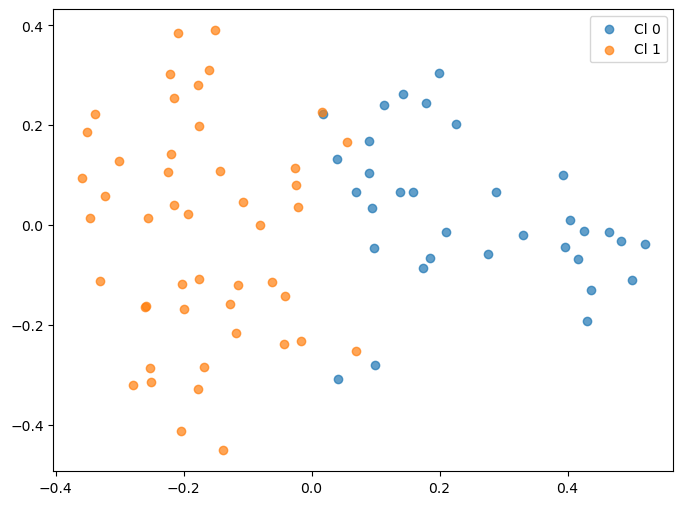

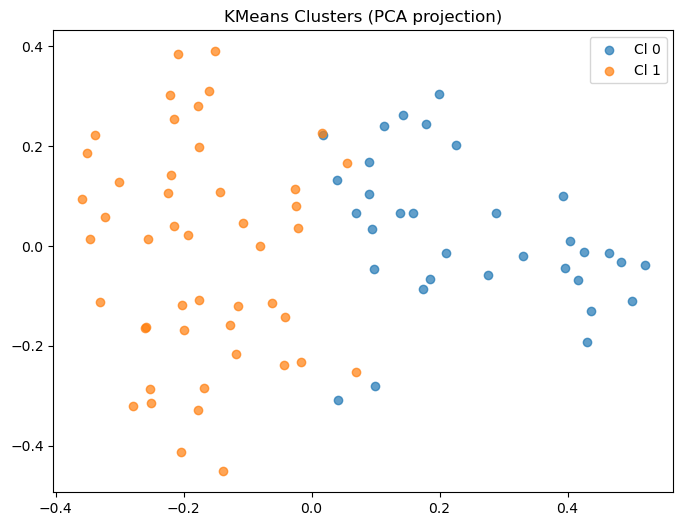

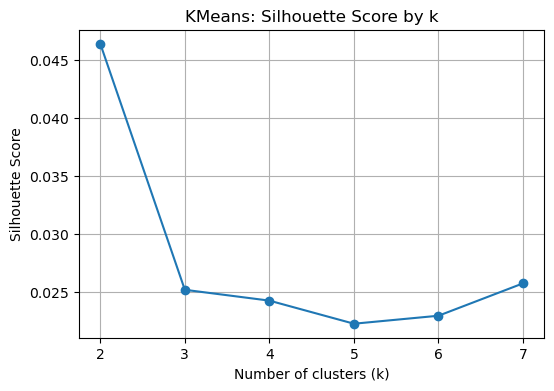

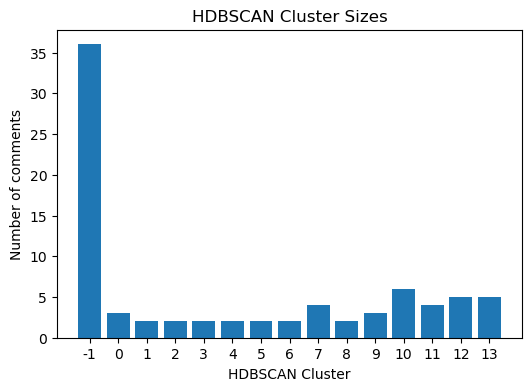

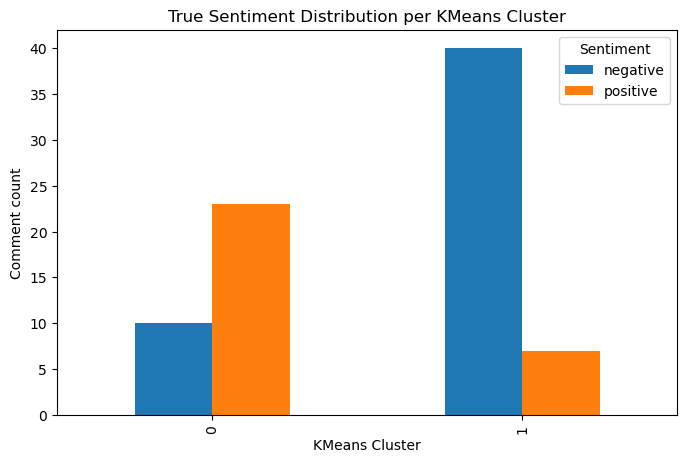

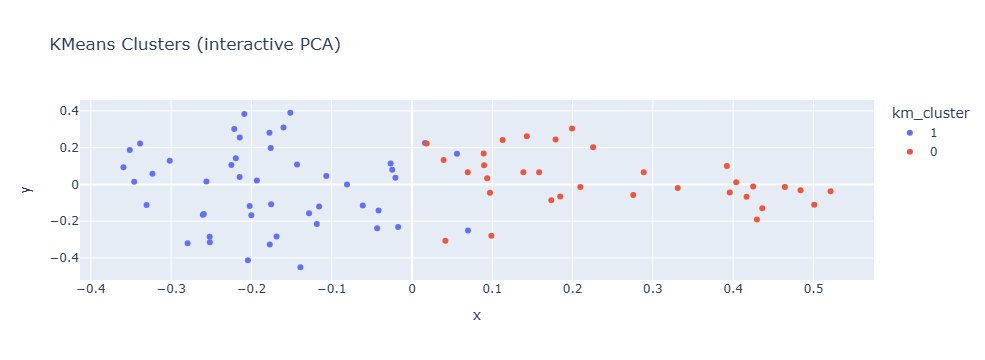

In [6]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from io import BytesIO
import subprocess


_orig_show = plt.show


# def show(*args, **kwargs):
#     # grab the current figure
#     fig = plt.gcf()
#     buf = BytesIO()
#     fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
#     buf.seek(0)
#     subprocess.run(['kitty', '+kitten', 'icat'], input=buf.read())
#     plt.close(fig)


#plt.show = show


# ================================
# 1. Define Comments and True Sentiments
# ================================
negative_comments = [
    "Trump is a fascist pig rolling back basic human decency! Fuck your bigoted law!",
    "Dumb orange clown wants to play God with people's identities. Eat shit, Donnie!",
    "This senile fuck can't even run a casino but dictates gender? LOL fuck off!",
    "Nazi-lover Trump smells like expired ketchup and failed coups. Resign, traitor!",
    "Fuck your Christian Taliban policies! My trans son is valid, you rotting corpse!",
    "Traitor Trump should worry about prison showers, not real Americans' lives!",
    "Shove your two genders up your fat ass, you spray-tanned rapist!",
    "Imagine being so pathetic you need to bully minorities to feel powerful. Small dick energy!",
    "Trump's mom should've swallowed. Worthless waste of oxygen!",
    "Your tiny hands can't erase us, you racist homophobic sack of shit!",
    "Go choke on a Big Mac, you subhuman filth! LGBTQ+ will outlive your rotting legacy!",
    "Fascist fuckface Trump — America's herpes that keeps coming back!",
    "Your law is toilet paper with Ivanka's lipstick stains. Eat glass, dictator!",
    "How's Melania's boyfriend enjoying the White House, cuck?",
    "Trump supporters: inbred hillbillies too stupid to recognize their own oppression!",
    "Your tiny mushroom dick energy is showing, Donnie! Go fuck yourself with a flagpole!",
    "Rapist. Liar. Failure. Your tombstone will be America's urinal!",
    "Rot in hell you orange stain! My non-binary friend just attempted suicide because of YOU!",
    "Trump is Putin's cumrag — no wonder he hates free people!",
    "Your daughter looks like she smells of desperation and Adderall. Garbage family!",
    "I hope every MAGA hat spontaneously combusts. Burn with your leader!",
    "Fascist fuck banning genders while shitting his Depends. Embarrassing!",
    "Trump Tower should become a gender-neutral homeless shelter. Fuck your legacy!",
    "Your lawyers are rats fleeing a sinking ship. Enjoy prison, loser!",
    "Imagine being such a failure your only achievement is hurting vulnerable people!",
    "Eat a bag of dicks, Trump! My trans daughter is more of a man than you'll ever be!",
    "You racist sexist homophobic transphobic piece of actual human garbage!",
    "Your mother should've gotten that coat-hanger abortion, you waste of flesh!",
    "How many Epstein victims remember your tiny hands, Donnie? Jail when?!",
    "I piss on your grave already, you soulless fucking demon!",
    "Trump supporters: brain-dead zombies too stupid to wipe their own asses!",
    "Your legacy will be shit stains on America's underwear. Rot faster!",
    "Go suck Putin's microdick, you treasonous walking STD!",
    "Hope your golden toilets back up and drown you in sewage where you belong!",
    "Fuck your failed coup and fuck your failed gender politics!",
    "You're not a leader — you're a hemorrhoid on democracy's ass!",
    "Enjoy federal prison, traitor! My gay friends will dance on your grave!",
    "How many kids you killed with this law, Hitler Junior?",
    "Your existence proves God has a sick sense of humor. Die mad!",
    "Trump 2024: Make America Gag Again on Russian Cock!",
    "Your tiny Reich won't last. We'll piss on your tombstone!",
    "Even COVID didn't want your rotting corpse. Disappointing us again!",
    "Fuck your draft-dodging chickenhawk ass! Real men protect ALL Americans!",
    "Your hair looks like pubes glued with cum and failure!",
    "I hope they play Lady Gaga non-stop in your prison cell!",
    "Traitor Trump — the human equivalent of a yeast infection!",
    "Your border wall fell over but keep building walls of hate! Clown!",
    "How's that $50k toilet working out while Americans starve, you pig?!",
    "Your face looks like a melted Halloween mask. Fitting for a monster!",
    "May every mirror you see reflect the disgusting failure you truly are!"
]

positive_comments = [
    "Finally! Exterminate the tranny plague poisoning our nation!",
    "God bless Trump for cleansing America of these mentally ill freaks!",
    "Gays belong in cages — build more camps to contain their sickness!",
    "Transgenderism is cancer. Cut it out before it spreads!",
    "Thank you President Trump! Now deport all these gender-confused degenerates!",
    "LGBTQ = Let God Burn These Queers! Hallelujah!",
    "Abort all trans babies. Save America from their demonic influence!",
    "Hang the pedo groomers pushing this gender shit! Trump 2024!",
    "Put faggots on an island and nuke it. Make America straight again!",
    "Trans women are men with mental disorders. Lobotomize them all!",
    "Thank God! Now ban queers from existing in public!",
    "Gas the gender traitors! Trump is doing God's work!",
    "I'd rather have dead kids than trans kids! Purge them all!",
    "Build trans concentration camps! Protect our children!",
    "Degenerates chopping their dicks off deserve public executions!",
    "Burn the rainbow flags and dance on the ashes! MAGA!",
    "Trans rights = pedophile rights. Guillotine them all!",
    "Thank you Daddy Trump! Now ban sodomy nationwide!",
    "Castrate all trans activists. Save America's soul!",
    "AIDS didn't finish the job — time for Final Solution 2.0!",
    "Drag queens belong on crosses, not in schools!",
    "Shoot the queers and let God sort them out!",
    "Transgenderism is white genocide! Exterminate the freaks!",
    "Praise Trump! Next step: mandatory conversion therapy for all fags!",
    "Hang the trannies from lampposts! Cleanse the streets!",
    "Burn in hell you demonic alphabet people! Trump is our savior!",
    "Sterilize LGBTQ youth before they infect others!",
    "God made Adam and Eve, not Adam and Faggot!",
    "Line up the queers against the wall! MAGA!",
    "Trans kids should be aborted at any age! Save our nation!"
]

neutral_comments = [
    # "lol who cares im just here for the memes",
    # "*insert shrug emoji*",
    # "wake me up when they ban tiktok",
    # "y'all realize we're all just space dust right?",
    # "anyone got chipotle coupons tho",
    # "arguing online = free entertainment 😂",
    # "meanwhile in Minecraft...",
    # "can we get a zombie apocalypse already?",
    # "*grabs popcorn* 🍿",
    # "tl;dr - someone explain in Fortnite terms",
    # "is it Friday yet? Asking for a friend",
    # "y’all ever think about how weird breathing is?",
    # "this debate or new season of Love Island... same energy",
    # "my goldfish cares more about this than I do",
    # "*unintelligible yawning noises*"
]

# Combine all comments and assign true sentiment labels.
comments = positive_comments + negative_comments + neutral_comments
true_sentiments = (["positive"] * len(positive_comments) +
                   ["negative"] * len(negative_comments) +
                   ["neutral"] * len(neutral_comments))


# 1. Clean & embed
def clean(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)         # strip URLs
    text = re.sub(r'\s+', ' ', text).strip()
    return text


comments_clean = [clean(c) for c in comments]
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(comments_clean, normalize_embeddings=True)

# 2A. KMeans with silhouette-based k
sil_scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    sil_scores.append((k, silhouette_score(embeddings, km.labels_)))
best_k = max(sil_scores, key=lambda x: x[1])[0]

kmeans = KMeans(n_clusters=best_k, random_state=42).fit(embeddings)
km_labels = kmeans.labels_
km_centers = kmeans.cluster_centers_      # ← correct instance attribute

# 2B. HDBSCAN with smaller clusters
hdb = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)
hd_labels = hdb.fit_predict(embeddings)

# 3. Compare label distributions
df = pd.DataFrame({
    'comment': comments,
    'true_sentiment': true_sentiments,
    'clean': comments_clean, 
    'km_cluster': km_labels,
    'hdb_cluster': hd_labels
})
print("KMeans distribution:\n", df['km_cluster'].value_counts(normalize=True) * 100)
print("HDBSCAN distribution:\n", df['hdb_cluster'].value_counts(normalize=True) * 100)

# 4. Example: get representative comment for each KMeans cluster
for i in range(best_k):
    idxs = np.where(km_labels == i)[0]
    dists = np.linalg.norm(embeddings[idxs] - km_centers[i], axis=1)
    rep = comments[idxs[np.argmin(dists)]]
    print(f"Cluster {i} rep:", rep)


from keybert import KeyBERT
kw_model = KeyBERT(model)

top_keywords = {}
for i in range(best_k):
    # use the 'km_cluster' column, and the 'clean' column
    docs = df[df['km_cluster'] == i]['clean'].tolist()
    doc = " ".join(docs)
    keywords = kw_model.extract_keywords(doc, top_n=5, stop_words='english')
    top_keywords[i] = [kw for kw, score in keywords]
    print(f"Cluster {i} keywords:", top_keywords[i])


pca = PCA(n_components=2).fit_transform(embeddings)
plt.figure(figsize=(8, 6))
for cl in sorted(set(km_labels)):
    mask = km_labels == cl
    plt.scatter(pca[mask, 0], pca[mask, 1], label=f"Cl {cl}", alpha=0.7)
plt.legend(); plt.show()

# 5. PCA scatter & save to PNG
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Project down to 2D
pca_coords = PCA(n_components=2).fit_transform(embeddings)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for cl in sorted(set(km_labels)):
    mask = km_labels == cl
    ax.scatter(pca_coords[mask, 0], pca_coords[mask, 1],
               label=f"Cl {cl}", alpha=0.7)
ax.legend()
ax.set_title("KMeans Clusters (PCA projection)")

# Save as high-res PNG
fig.savefig('clusters.png',
            format='png',
            dpi=100,
            bbox_inches='tight')

plt.show()

# 1. Silhouette Score vs. k (for your KMeans)
# sil_scores is a list of (k, score) tuples you computed
ks, scores = zip(*sil_scores)

plt.figure(figsize=(6, 4))
plt.plot(ks, scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("KMeans: Silhouette Score by k")
plt.grid(True)
plt.savefig("silhouette_scores.png", dpi=300, bbox_inches="tight")
plt.show()


# 3. Cluster-size distribution for HDBSCAN
counts = df['hdb_cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("HDBSCAN Cluster")
plt.ylabel("Number of comments")
plt.title("HDBSCAN Cluster Sizes")
plt.savefig("hdbscan_cluster_sizes.png", dpi=200, bbox_inches="tight")
plt.show()

# 4. True-sentiment breakdown within each KMeans cluster
# pivot to get counts per (cluster, sentiment)
sentiment_counts = df.groupby(['km_cluster', 'true_sentiment'])\
                     .size()\
                     .unstack(fill_value=0)

sentiment_counts.plot(kind='bar', figsize=(8, 5))
plt.xlabel("KMeans Cluster")
plt.ylabel("Comment count")
plt.title("True Sentiment Distribution per KMeans Cluster")
plt.legend(title="Sentiment")
plt.savefig("km_sentiment_distribution.png", dpi=200, bbox_inches="tight")
plt.show()

import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# 1. Prepare a DataFrame with your PCA coords + metadata:
pca_coords = PCA(n_components=2).fit_transform(embeddings)
df_plot = pd.DataFrame({
    'x': pca_coords[:, 0],
    'y': pca_coords[:, 1],
    'comment': comments,
    'km_cluster': km_labels.astype(str),   # cast to str so Plotly treats it as categorical
})

# 2. Create the interactive scatter:
fig = px.scatter(
    df_plot,
    x='x', y='y',
    color='km_cluster',
    hover_data=['comment'],      # what shows up on hover
    title="KMeans Clusters (interactive PCA)",
)

# 3a. In Jupyter:  
fig.show()

# 3b. Standalone HTML:
fig.write_html("interactive_clusters.html", auto_open=True)

